# Text summarization tool using Natural Language Toolkit (NLTK)

In [42]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import warnings
warnings.filterwarnings('ignore')  
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter


In [46]:
text="""
On a dark night, a fierce storm gave Florida a sharp blow to the head. Less than two weeks later, another tore through its heart.

After Helene’s strong winds, heavy rains and a wall of water took 20 lives in the state along its path from south to north, Milton had claimed at least 17 more, bringing the ocean’s fury ashore with several feet of storm surge, three months worth of rain in three hours to some areas and a deadly tornado outbreak as it churned from west to east.

The trail of destruction all the way from the Gulf to the Atlantic is vast. Flooded, blocked by fallen trees or damaged, impassable streets number in the hundreds. Exhausted emergency responders have rescued more than a thousand. And an already weakened power grid buckled for millions.

Even in a state accustomed to bouts of bad weather, facing shortages of groceries and gasoline, a tangle of insurance paperwork and debris from the last hurricane scattered anew, Floridians must now try to recover from back-to-back “once in a lifetime” storms.

Here is the latest:

• Flooding remains a threat along swollen rivers: Milton’s deluge has left behind several bloated, slow-to-recede rivers across central and north Florida, following a pattern seen during other tropical storms and hurricanes that have approached the state in recent years. High water drains slowly across Florida’s flat terrain, which has prolonged the flooding and prompted several of the rescues that continue Saturday. CNN meteorologists said areas near Tampa downstream of the Hillsborough River, which remained at major flood stage early Saturday, may face more flooding in the coming days. The Alafia River in Lithia, east of hard-hit Tampa, crossed major flood stage Thursday and exceeded more than 24 feet on Friday. The Anclote River, north of Clearwater, and the St. Johns River, between Orlando and Daytona Beach, both approaching new all-time records, are expected to remain at major flood stage through the weekend. Several people trapped in flooded homes were among the more than 1,200 people rescued since Milton’s landfall.

• Millions still without power: The number of Florida customers still in the dark dropped by more than a million between Thursday morning and Friday afternoon, signaling progress by energy companies working to restore electricity across the state, but just under 2 million remained without power by early Saturday according to PowerOutage.us. An outage left the sewer system in Sanibel, Florida, out of order by Friday, prompting the city manager to urge residents not to use their toilets or showers.

• Gasoline shortage continues across the state: Gasoline was hard to come by in the Tampa Bay area as an ongoing fuel shortage wiped out the supply to more than three in four gas stations in the area by Friday afternoon, according to gas price-tracking platform GasBuddy. Across Florida, nearly 30% of stations were without fuel, with 77.5% of those shortages reported in the Tampa-St. Petersburg area. The state’s authorities were working to distribute fuel “as fast as humanly possible,” said Gov. Ron DeSantis, who added Friday the state still had an inventory of 1 million gallons of gas.

• Airports, ocean ports and theme parks reopening: Tampa International Airport has reopened after service was suspended three days, while Sarasota Bradenton International Airport will remain closed until 9 a.m. ET Wednesday as crews work to address damage caused by the storm. The Coast Guard has reopened some ports in Florida, as well as several ports in Georgia and South Carolina, although many Florida ports were still closed as of Friday. Meanwhile, Walt Disney World, Aquatica Orlando, Discovery Cove and SeaWorld Orlando theme parks have resumed welcoming visitors. Busch Gardens Tampa Bay and Adventure Island, however, will remain closed on Saturday."""


In [31]:
stopWords = set(stopwords.words("english")) 
words = word_tokenize(text) 
freqTable = dict() 

In [32]:
sentences=sent_tokenize(text)
sentenceValue=dict()

Analysis of text 

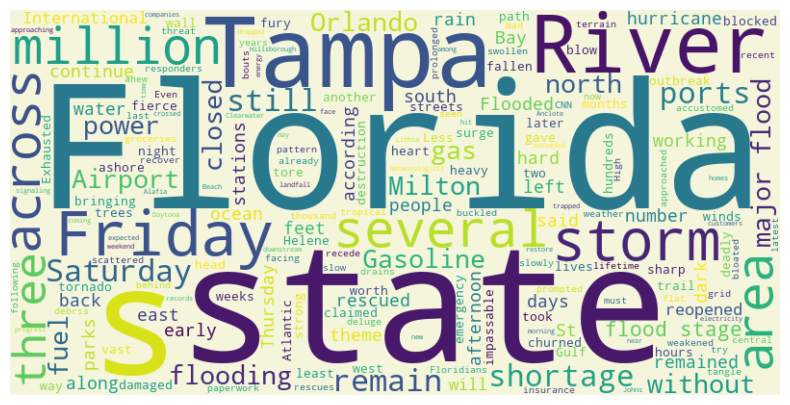

In [47]:
wordcloud = WordCloud(width=800, height=400, background_color='beige').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

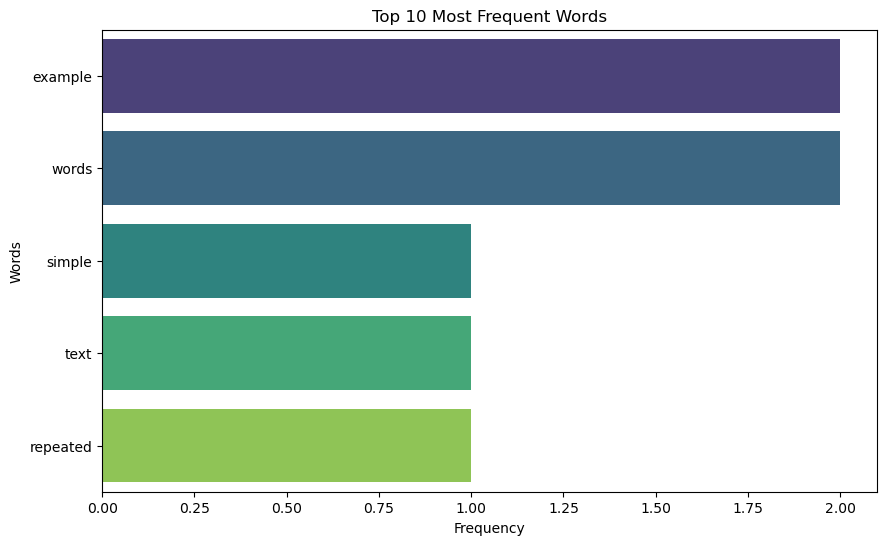

In [48]:

filtered_words = [word.lower() for word in words if word.lower() not in stopWords]

# Get the most common words
word_freq = Counter(filtered_words).most_common(5)  # Top 10 frequent words
words, counts = zip(*word_freq)

# Ensure they are lists, not NumPy arrays or other data types
words = list(words)
counts = list(counts)

# Plot the frequency chart
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words, palette='viridis')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


Text summarization code 

In [51]:

stopWords = set(stopwords.words("english"))
words = word_tokenize(text)
print("*************Original text is:\n", text)

freqTable = dict()
for word in words:
    word = word.lower()
    if word in stopWords:
        continue
    if word in freqTable:
        freqTable[word] += 1
    else:
        freqTable[word] = 1

sentences = sent_tokenize(text)
sentenceValue = dict()

for sentence in sentences:
    for word, freq in freqTable.items():
        if word in sentence.lower():
            if sentence in sentenceValue:
                sentenceValue[sentence] += freq
            else:
                sentenceValue[sentence] = freq

sumValues = sum(sentenceValue.values())
average = int(sumValues / len(sentenceValue))

summary = ''
for sentence in sentences:
    if (sentence in sentenceValue) and (sentenceValue[sentence] > (1.0 * average)):
        summary += " " + sentence

print("\n\n*********************** Summary of the text is:\n", summary)


*************Original text is:
 
On a dark night, a fierce storm gave Florida a sharp blow to the head. Less than two weeks later, another tore through its heart.

After Helene’s strong winds, heavy rains and a wall of water took 20 lives in the state along its path from south to north, Milton had claimed at least 17 more, bringing the ocean’s fury ashore with several feet of storm surge, three months worth of rain in three hours to some areas and a deadly tornado outbreak as it churned from west to east.

The trail of destruction all the way from the Gulf to the Atlantic is vast. Flooded, blocked by fallen trees or damaged, impassable streets number in the hundreds. Exhausted emergency responders have rescued more than a thousand. And an already weakened power grid buckled for millions.

Even in a state accustomed to bouts of bad weather, facing shortages of groceries and gasoline, a tangle of insurance paperwork and debris from the last hurricane scattered anew, Floridians must now t